In [4]:
import sns
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from azure.ai.vision.imageanalysis.models import VisualFeatures

from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import json

In [5]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''


def load_config(config_path='../config.json'):
    with open(config_path, 'r') as config_file:
        config = json.load(config_file)
    return config


config = load_config()
subscription_key = config['subscription_key']
endpoint = config['endpoint']
#
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

Obiecte detectate în images\bike02.jpg: ['Wheel', 'bicycle']
Obiecte detectate în images\bike03.jpg: ['car', 'person', 'person', 'bicycle']
Obiecte detectate în images\bike04.jpg: ['bicycle']
Obiecte detectate în images\bike05.jpg: ['bicycle']
Obiecte detectate în images\bike06.jpg: ['car', 'person', 'person', 'cycle']
Obiecte detectate în images\bike07.jpg: ['person', 'bicycle']
Obiecte detectate în images\bike08.jpg: ['person']
Obiecte detectate în images\bike09.jpg: ['bicycle']
Obiecte detectate în images\bike1.jpg: ['bicycle']
Obiecte detectate în images\bike10.jpg: ['Gondola', 'bicycle']
Obiecte detectate în images\traffic01.jpg: ['person', 'car']
Obiecte detectate în images\traffic02.jpg: []
Obiecte detectate în images\traffic03.jpg: []
Obiecte detectate în images\traffic04.jpg: []
Obiecte detectate în images\traffic05.jpg: []
Obiecte detectate în images\traffic06.jpg: ['car']
Obiecte detectate în images\traffic07.jpg: ['stop sign']
Obiecte detectate în images\traffic08.jpg: ['ca

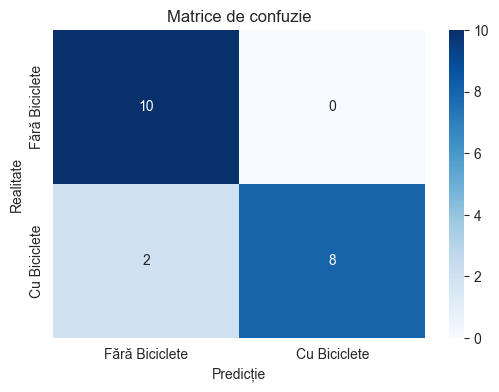

Acuratețe: 0.90
Precizie: 1.00
Recall: 0.80
Scor F1: 0.89


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import seaborn as sns


folder_path = 'images'  

files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

real_labels = []
for file in files:
    if 'bike' in file.lower():
        real_labels.append(1)  
    elif 'traffic' in file.lower():
        real_labels.append(0)  

predicted_labels = []

def detect_bicycle_in_image(image_path):
    with open(image_path, "rb") as image_stream:
        
        objects = computervision_client.detect_objects_in_stream(image_stream)
    
   
    detected_objects = [obj.object_property for obj in objects.objects]
    print(f"Obiecte detectate in {image_path}: {detected_objects}")
    
    
    if 'bicycle' in detected_objects:
        return 1  
    else:
        return 0  

for file in files:
    image_path = os.path.join(folder_path, file)
    prediction = detect_bicycle_in_image(image_path)
    predicted_labels.append(prediction)

cm = confusion_matrix(real_labels, predicted_labels)

accuracy = accuracy_score(real_labels, predicted_labels)
precision = precision_score(real_labels, predicted_labels)
recall = recall_score(real_labels, predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fara Biciclete', 'Cu Biciclete'], yticklabels=['Fara Biciclete', 'Cu Biciclete'])
plt.xlabel('Predictie')
plt.ylabel('Realitate')
plt.title('Matrice de confuzie')
plt.show()

print(f'Acuratete: {accuracy:.2f}')
print(f'Precizie: {precision:.2f}')
print(f'Recall: {recall:.2f}')

ML algortim test

C:\Users\LENOVO\PycharmProjects\AI\LAB4\venv\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\LENOVO\PycharmProjects\AI\LAB4\venv\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\LENOVO\PycharmProjects\AI\LAB4\venv\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


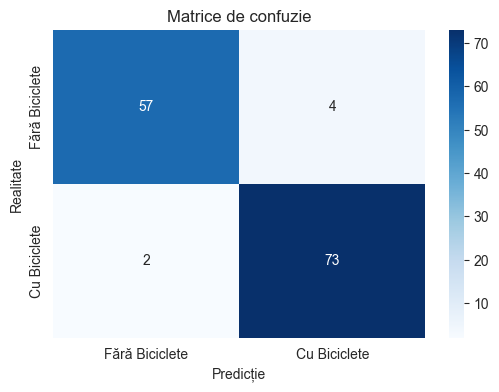

Acuratețe: 0.96
Precizie: 0.95
Recall: 0.97
Scor F1: 0.96


In [8]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


folder_path = 'images/test'  

def extract_hog_features(image_path):
    image = io.imread(image_path)
    if image.shape[-1] == 4:
        image = color.rgba2rgb(image)  
    image = color.rgb2gray(image)
    image = transform.resize(image, (128, 128))
    hog_features = hog(image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
    return hog_features

files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
real_labels = [1 if 'bike' in f.lower() else 0 for f in files]  
features = []


for file in files:
    image_path = os.path.join(folder_path, file)
    hog_features = extract_hog_features(image_path)
    features.append(hog_features)

X = np.array(features)
y = np.array(real_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predicted_labels = model.predict(X_test)


cm = confusion_matrix(y_test, predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fara Biciclete', 'Cu Biciclete'], yticklabels=['Fara Biciclete', 'Cu Biciclete'])
plt.xlabel('Predictie')
plt.ylabel('Realitate')
plt.title('Matrice de confuzie')
plt.show()


print(f'Acuratete: {accuracy:.2f}')
print(f'Precizie: {precision:.2f}')
print(f'Recall: {recall:.2f}')

ML algortim pe imagini lab

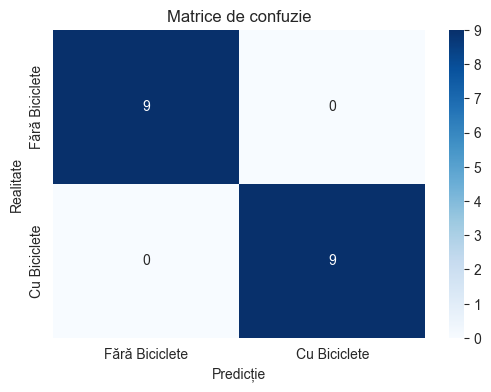

Acuratețe: 1.00
Precizie: 1.00
Recall: 1.00
Scor F1: 1.00


In [12]:
import os
import numpy as np
from skimage import io, color, transform
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


folder_path = 'images'  

def extract_hog_features(image_path):
    image = io.imread(image_path)
    if image.shape[-1] == 4:
        image = color.rgba2rgb(image)  
    image = color.rgb2gray(image)
    image = transform.resize(image, (128, 128))
    hog_features = hog(image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
    return hog_features

files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
real_labels = [1 if 'bike' in f.lower() else 0 for f in files]  
features = []

for file in files:
    image_path = os.path.join(folder_path, file)
    hog_features = extract_hog_features(image_path)
    features.append(hog_features)

X = np.array(features)
y = np.array(real_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predicted_labels = model.predict(X_test)


cm = confusion_matrix(y_test, predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fara Biciclete', 'Cu Biciclete'], yticklabels=['Fara Biciclete', 'Cu Biciclete'])
plt.xlabel('Predictie')
plt.ylabel('Realitate')
plt.title('Matrice de confuzie')
plt.show()


print(f'Acuratete: {accuracy:.2f}')
print(f'Precizie: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Scor F1: {f1:.2f}')